In [86]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import cv2

import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from tensorflow.math import confusion_matrix

import torch

In [87]:
print("CUDA available:", torch.cuda.is_available())
print("GPU count:", torch.cuda.device_count())

if torch.cuda.is_available():
    print("GPU name:", torch.cuda.get_device_name(0))

CUDA available: True
GPU count: 1
GPU name: NVIDIA GeForce RTX 3050 Laptop GPU


In [88]:
(features_train, target_train) , (features_test, target_test) = keras.datasets.mnist.load_data()

In [89]:
print(features_train.shape, features_test.shape)
print(target_train.shape, target_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


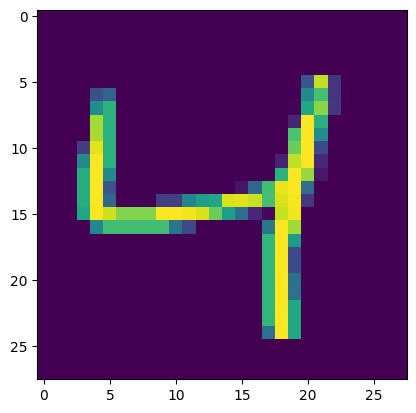

4


In [90]:
plt.imshow(features_train[2])
plt.show()
print(target_train[2])

In [91]:
features_train = features_train / 255;
features_test = features_test / 255;

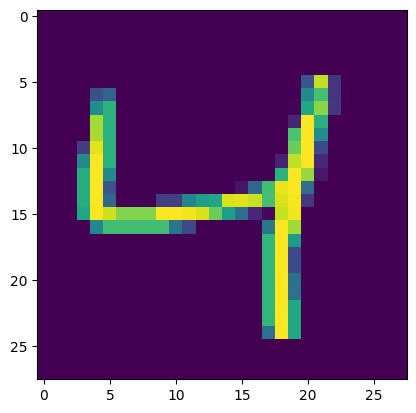

4


In [92]:
plt.imshow(features_train[2])
plt.show()
print(target_train[2])

In [106]:
model = keras.Sequential([
    keras.layers.Input(shape=(28,28)),
    keras.layers.Flatten(),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [107]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [108]:
history = model.fit(
    features_train,
    target_train,
    validation_split=0.2,
    epochs=10
)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9048 - loss: 0.3281 - val_accuracy: 0.9357 - val_loss: 0.2138
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9538 - loss: 0.1541 - val_accuracy: 0.9419 - val_loss: 0.1881
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9663 - loss: 0.1131 - val_accuracy: 0.9477 - val_loss: 0.1699
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9733 - loss: 0.0893 - val_accuracy: 0.9542 - val_loss: 0.1548
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9785 - loss: 0.0725 - val_accuracy: 0.9578 - val_loss: 0.1456
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9821 - loss: 0.0601 - val_accuracy: 0.9595 - val_loss: 0.1430
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9847 - loss: 0.0505 - val_accuracy: 0.9629 - val_loss: 0.1367
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9870 - loss: 0.0425 - 

In [109]:
loss, accuracy = model.evaluate(features_test,target_test)
print(f'Accuracy for testing data is {accuracy}')
print(f'Loss for testing data is {loss}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9645 - loss: 0.1462
Accuracy for testing data is 0.9645000100135803
Loss for testing data is 0.14620493352413177


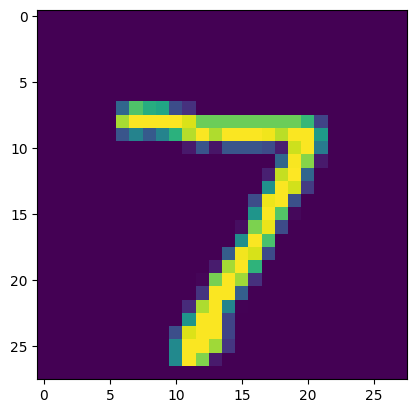

7


In [110]:
plt.imshow(features_test[0])
plt.show()
print(target_test[0])

In [111]:
prediction = model.predict(features_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step


In [113]:
print(prediction[0])

[2.2548284e-11 3.7212389e-10 7.8722344e-09 6.1293799e-06 1.2203053e-17
 2.3166081e-07 4.0118318e-18 9.9999011e-01 4.1550494e-10 3.5393534e-06]


In [114]:
print(np.argmax(prediction[0]))

7


In [115]:
prediction_label = []
for i in prediction:
    prediction_label.append(np.argmax(i))

In [117]:
size = len(prediction_label)
correct_prediction = 0;
for i in range(0,size):
    if prediction_label[i] == target_test[i]:
        correct_prediction += 1

In [118]:
print(f'Manually calculated accuracy is {(correct_prediction / size)*100} %' )

Manually calculated accuracy is 96.45 %


In [119]:
conf_mat = confusion_matrix(target_test,prediction_label)

<Axes: >

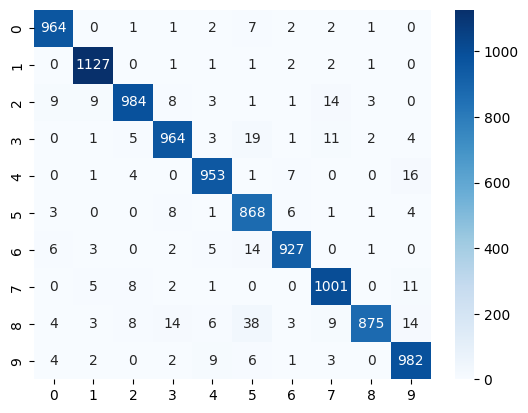

In [120]:
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')